In [ ]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
print(net)

Files already downloaded and verified
Files already downloaded and verified
12500
 bird truck   dog   dog


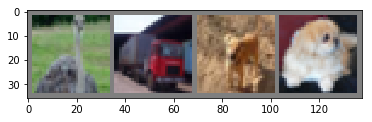

In [10]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 23 14:02:48 2017

@author: lrh
"""


import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='/mnt/hgfs/ubuntu14/dataset', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='/mnt/hgfs/ubuntu14/dataset', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


print len(trainloader)

# get some random training images
dataiter = iter(trainloader)

##FloatTensor  [batch_size,channel,height,width]
##[4,1,32,32]
images, labels = dataiter.next()


# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))
plt.show()

In [ ]:
# -*- coding: utf-8 -*-

import torch
import torchvision
import torchvision.transforms as transforms

########################################################################
# The output of torchvision datasets are PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1]

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='/mnt/hgfs/ubuntu14/dataset', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='/mnt/hgfs/ubuntu14/dataset', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

########################################################################
# Let us show some of the training images, for fun.

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


########################################################################
# 2. Define a Convolution Neural Network
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# Copy the neural network from the Neural Networks section before and modify it to
# take 3-channel images (instead of 1-channel images as it was defined).

from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

########################################################################
# 3. Define a Loss function and optimizer
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# Let's use a Classification Cross-Entropy loss and SGD with momentum

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

########################################################################
# 4. Train the network
# ^^^^^^^^^^^^^^^^^^^^
#
# This is when things start to get interesting.
# We simply have to loop over our data iterator, and feed the inputs to the
# network and optimize

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

########################################################################
# 5. Test the network on the test data
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#
# We have trained the network for 2 passes over the training dataset.
# But we need to check if the network has learnt anything at all.
#
# We will check this by predicting the class label that the neural network
# outputs, and checking it against the ground-truth. If the prediction is
# correct, we add the sample to the list of correct predictions.
#
# Okay, first step. Let us display an image from the test set to get familiar.

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

########################################################################
# Okay, now let us see what the neural network thinks these examples above are:

outputs = net(Variable(images))

########################################################################
# The outputs are energies for the 10 classes.
# Higher the energy for a class, the more the network
# thinks that the image is of the particular class.
# So, let's get the index of the highest energy:
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

########################################################################
# The results seem pretty good.
#
# Let us look at how the network performs on the whole dataset.

correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

########################################################################
# That looks waaay better than chance, which is 10% accuracy (randomly picking
# a class out of 10 classes).
# Seems like the network learnt something.
#
# Hmmm, what are the classes that performed well, and the classes that did
# not perform well:

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))


In [ ]:
#%%
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

"""
input:[batch_size,in_channel,height,width]
kernel:[out_channel,in_channel,kh,kw]
"""
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        #(28-5+1)/2=12
        self.conv2 = nn.Conv2d(6, 16, 5)
        #(12-5+1)/2=4
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        print "after conv1 size is {}".format(x.size())
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        print "after conv2 size is {}".format(x.size())
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

net = Net()
print(net)

print "hello world"
input = Variable(torch.Tensor(np.random.randint(1,10,size=(1,1,32,32))))
print net.forward(input)

In [ ]:
import torch
import numpy as np
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
print torch.Tensor([1,2])

class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        
    def forward(self,x):
        x = self.conv1(x)
        return x
    
net= Net()
print net
input = Variable(torch.Tensor(1,1,32,32))
net(input)

In [ ]:
import torch
not torch.cuda.is_available()

In [ ]:
import torch
from torch.autograd import Variable
import torch.optim as optim
from torch.nn.parameter import Parameter
learning_rate = 0.009;

x = Parameter(torch.Tensor([10]),requires_grad=True);

print type(x)
def loss_fun(x):
    loss = x**2-10*x+50
    return loss

optimizer = optim.Adam([x], lr = 0.1)
#I think it's a much better design choice to keep Variables immutable,
#immutable : so it will rebuild a new variable.
########################--apaszke
for i in range(1000):
    l = loss_fun(x)
    loss = l**2
    
    #loss.backward()
    
    #print x.grad
    
    ####intermediary variable grad is None.!!!
    #print l.grad
    
    #x.grad.data.fill_(0)
    #x.data.sub_(learning_rate*x.grad.data)
    #print x
    #x.grad = None
    #x.grad.data.fill_(0)
    #print x
    #print "grad:{}".format(x.grad)
    #print type(x)
    #x = Variable((x - learning_rate*x.grad).data,requires_grad=True)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print x

In [ ]:
import torch
a = Variable(torch.Tensor([[1,2]]));
def f(a):
    a[0][1] = 5

f(a)
print a
    

In [ ]:
def F():
    for i in range(5, 9):
        for j in range(21, 29):
            x = yield i
            print x
            y = (yield j) * 100
            x += y
            print '>>>', x

gen = F()
gen.send(None)
#a2 = gen.next()
#gen.next()
a1 = gen.send(66)
a2 = gen.send(77)
print a1
print a2

In [ ]:
def consumer():
    r = -5
    for i in xrange(3):
        n = yield r
        print n
        
c = consumer()

print "first run generator:{}".format(c.next())

print "second run generator:{}".format(c.next())

print c.next()

#c.send(10)

In [ ]:
def f():
    i = 0
    for n in xrange(3):
        i = yield i
        print "i in function:{}".format(i)
        
c = f()
print c.next()

c.send(10)
c.send(20)
c.send(30)

In [ ]:
prefix = ''
'.' if prefix else "hello world"

In [ ]:
from __future__ import print_function
import torch
import numpy as np
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
print(torch.Tensor([1,2]))


############################################module
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.weight = nn.Parameter(torch.Tensor([[1,2]]))
        self.bias = nn.Parameter(torch.Tensor([[1]]))
        
    def forward(self,x):
        x = nn.Sigmoid()(self.weight.mm(x)+self.bias)
        return x
    
net= Net()
print(net)
#input = Variable(torch.Tensor(1,1,32,32))

input = Variable(torch.Tensor([[1],[2]]))

#for parameter in net.parameters():
#    print parameter

labels = 1;

##############################################loss
def loss_fn(labels,logits):
    l = labels*torch.log(logits)+(1-labels)*(torch.log(1-logits))
    return -l;




###############################################optimizer
optimizer = optim.SGD(net.parameters(),lr = 0.01, momentum=0.9)



############################################training
running_loss = 0.0
for i in xrange(1000):
    logits = net(input)
    loss = loss_fn(labels,logits)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if i%100 == 0:
        print ("loss is %3f" %(loss.data[0][0]))
        
print(net(input).data[0][0])

In [ ]:
import torch
a = torch.Tensor([[1,2]])
b = torch.Tensor([[1],[2]])
print a.mm(b)

In [21]:
import torch
from torch.nn.parameter import Parameter
from torch.autograd import Variable
w1 = Parameter(torch.Tensor([1]))
w2 = Parameter(torch.Tensor([2]))

y = w1*2
z = w2*y
out = z - 5 
out.backward()

print w2.grad

Variable containing:
 2
[torch.FloatTensor of size 1]

